In [10]:
import pandas as pd

# The U.S. National Epidemiological Survey on Alcohol and Related Conditions (NESARC) is a survey
# designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population. 
# It is a representative sample of the non-institutionalized population 18 years and older.
#
# Selected variables for the test (that is, what is the association between the variables?)
# S1Q11A - TOTAL FAMILY INCOME IN LAST 12 MONTHS (FAMILY INCOME IN DOLLARS)
# S1Q12A - TOTAL HOUSEHOLD INCOME IN LAST 12 MONTHS (HOUSEHOLD INCOME IN DOLLARS)
# NBS4 - NORM-BASED GENERAL HEALTH SCALE (SF12-V2R VALUE)
# NBS8 - NORM-BASED MENTAL HEALTH SCALE (SR-V2R VALUE) 

cols = ['S1Q10A', 'S1Q12A', 'NBS4', 'NBS8']

# Load the data
df = pd.read_csv('nesarc.csv', usecols=cols, low_memory=False)

In [11]:
# Remove non-numeric values
df = df[(df.NBS4 != 99) & (df.NBS8 != 99)]
df = df.apply(pd.to_numeric, errors='coerse').dropna()

# Print first 5 rows of the data set
print(df.head())

   S1Q10A  S1Q12A  NBS4  NBS8
0   17500   46500  62.0  64.5
1   11000   36000  55.5  58.4
2    6000    6000  29.6  52.3
3   27000   41500  62.0  64.5
4   42000   82000  55.5  58.4


In [12]:
# Calculate Pearson’s correlation coefficient between total family income and total household income 
from scipy import stats

r, p_val = stats.pearsonr(df.S1Q10A, df.S1Q12A)

print 'Pearson’s correlation coefficient: {0}'.format(round(r, 2))
print 'p-value: {0}'.format(round(p_val, 2))

Pearson’s correlation coefficient: 0.74
p-value: 0.0


In [13]:
# Calculate Pearson’s correlation coefficient between general health scaled and mental health scaled 
r, p_val = stats.pearsonr(df.NBS4, df.NBS8)

print 'Pearson’s correlation coefficient: {0}'.format(round(r, 2))
print 'p-value: {0}'.format(round(p_val, 2))

Pearson’s correlation coefficient: 0.35
p-value: 0.0


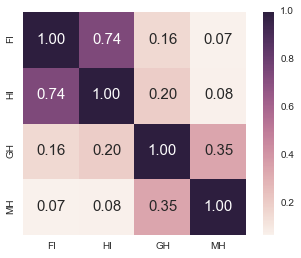

In [14]:
# Plot a correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

labels = ['FI', 'HI', 'GH', 'MH']
cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=labels,
                 xticklabels=labels)
plt.show()

In [15]:
# Model interpretation for the Pearson’s correlation
#
# A series of Pearson’s correlation tests showed a strong positive correlation between total family
# income and total household income, moderate positive correlation between general health scaled and
# mental health scaled, and weak positive correlation between total family or household income and 
# general or mental health scaled. The tests showed statistically significant p-values in all cases.  